<h1 align="center">Volume 2: The Fourier Transform.</h1>

    <Name>
    <Class>
    <Date>

<h2 align="center">Part 1: The Discrete Fourier Transform</h2>

In [66]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import wavfile
import IPython as IP
import scipy.fftpack as fft
import time

In [2]:
plt.rcParams["figure.dpi"] = 300             # Fix plot quality.
plt.rcParams["figure.figsize"] = (12,3)      # Change plot size / aspect (you may adjust this).

In [117]:
class SoundWave(object):
    """A class for working with digital audio signals."""

    # Problem 1.1
    def __init__(self, rate, samples):
        """Set the SoundWave class attributes.

        Parameters:
            rate (int): The sample rate of the sound.
            samples ((n,) ndarray): NumPy array of samples.
        """
        self.rate = rate
        self.samples = samples
        
        self.L = len(samples)
        
        
        

    # Problems 1.1 and 1.7
    def plot(self, DFT=False):
        """Plot the graph of the sound wave (time versus amplitude)."""
        second = self.L/self.rate
        
        seconds = np.linspace(0, second, self.L)
        ### plot sound wave
        
        if DFT:
            plt.subplot(1,2,1)
        plt.title("Wave")
        plt.xlabel("seconds")
        plt.plot(seconds, self.samples)
        plt.axis([0 ,second, -32768, 32767])
        plt.show()
        
        ###plot Frequencies 
        if DFT:
            plt.subplot(1,2,2)
            ffty = fft.fft(self.samples)
            y = np.abs(ffty[:len(ffty)//2])
    
            freq = [k*self.rate/self.L for k in range(len(y))]
        
            plt.title("plotting frequencies")
            plt.ylabel("Magnitudes")
            plt.xlabel("frequency")
            plt.plot(freq, y)
            
        
    # Problem 1.2
    def export(self, filename, force=False):
        """Generate a wav file from the sample rate and samples. 
        If the array of samples is not of type np.int16, scale it before exporting.

        Parameters:
            filename (str): The name of the wav file to export the sound to.
        """
        ### export sound to a wav file
        if self.samples.dtype != np.int16 or force: 
            #print("scaled")
            soudFile  = (self.samples.real/np.abs(np.max(self.samples)))
            scaledSamples = np.int16(soudFile* 32767)
        else:
            #print("not scaled")
            scaledSamples = self.samples
        wavfile.write(filename, self.rate, scaledSamples)
        
    
    # Problem 1.4
    def __add__(self, other):
        """Combine the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to add
                to the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the combined samples.

        Raises:
            ValueError: if the two sample arrays are not the same length.
        """
        ## combine another sample 
        if self.L != len(other.samples):
            raise ValueError("different lengths")
        self.samples = self.samples + other.samples
    # Problem 1.4
    def __rshift__(self, other):
        """Concatentate the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to concatenate
                to the samples contained in this object.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        ### add another sample 
        if self.rate != other.rate:
            raise ValueError("different rates")
        self.samples = np.hstack([self.samples, other.samples])
        
    
    # Problem 2.1  fsajkldfjkl
    def __mul__(self, other):
        """Convolve the samples from two SoundWave objects using circular convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        if self.rate != other.rate:
            raise ValueError("different rates") 
            
        
        len_s = self.L
        len_o = len(other.samples)

        if  len_s != len_o:
            if len_o < len_s:
                other.samples = np.append(other.samples, np.zeros(len_s-len_o))
            else:
                self.samples = np.append(self.samples, np.zeros(len_o-len_s))

        return fft.ifft(fft.fft(self.samples) * fft.fft(other.samples))

    # Problem 2.2
    def __pow__(self, other):
        """Convolve the samples from two SoundWave objects using linear convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        if self.rate != other.rate:
            raise ValueError("different rates") 
            
        
        n = self.L
        m = len(other.samples)
        N = n+m-1
        a = 0
        while 2**a < N :
            a+=1
        M = 2**a
            
        other.samples = np.append(other.samples, np.zeros(M -m))
        self.samples = np.append(self.samples, np.zeros(M-n))

        newSamples = fft.ifft(fft.fft(self.samples) * fft.fft(other.samples))
        
        return newSamples[:(N)]

    # Problem 2.4
    def clean(self, low_freq, high_freq):
        """Remove a range of frequencies from the samples using the DFT. 

        Parameters:
            low_freq (float): Lower bound of the frequency range to zero out.
            high_freq (float): Higher boound of the frequency range to zero out.
        """
        c = fft.fft(self.samples)

        i_l = int(low_freq*self.L/self.rate)
        i_h = int(high_freq*self.L/self.rate)
        c[i_l:i_h] = 0

        return fft.ifft(c)

### Problem 1.1

- Implement `SoundWave.__init__()`.
- Implement `SoundWave.plot()`.
- Use the `scipy.io.wavfile.read()` and the `SoundWave` class to plot `tada.wav`.

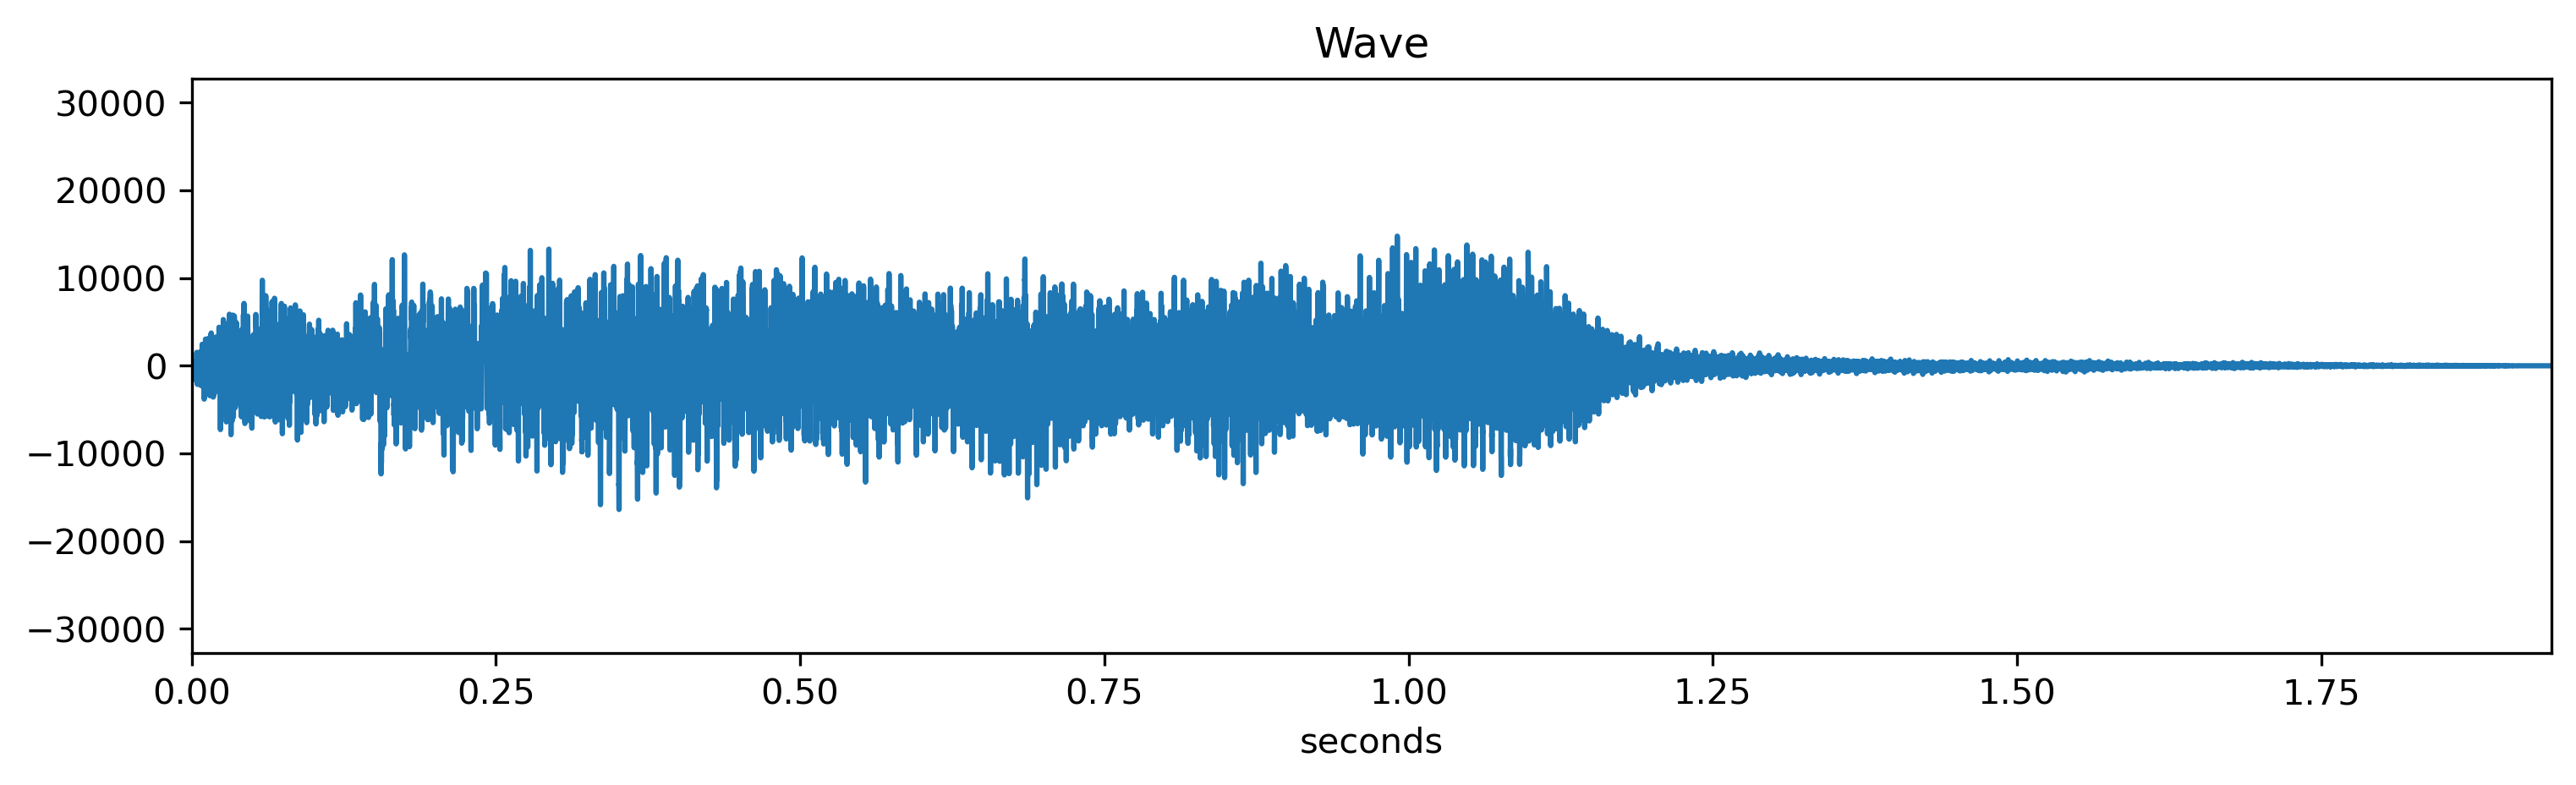

In [29]:

rate, samples = wavfile.read("tada.wav")
SW = SoundWave(rate,samples)
SW.plot()

### Problem 1.2

- Implement `SoundWave.export()`.
- Use the `export()` method to create two new files containing the same sound as `tada.wav`: one without scaling, and one with scaling (use `force=True`).
- Use `IPython.display.Audio()` to embed the original and new versions of `tada.wav` in the notebook.

In [30]:
SW.export("OT.wav")
SW.export("SOT.wav",True)

In [31]:

IP.display.Audio(filename='SOT.wav')

In [32]:
IP.display.Audio(filename='tada.wav')



In [33]:
IP.display.Audio(filename='OT.wav')

### Problem 1.3

- Implement `generate_note()`.
- Use `generate_note()` to create an A tone that lasts for two seconds. Embed it in the notebook.

In [34]:
def generate_note(frequency, duration):
    """Generate an instance of the SoundWave class corresponding to 
    the desired soundwave. Uses sample rate of 44100 Hz.
    
    Parameters:
        frequency (float): The frequency of the desired sound.
        duration (float): The length of the desired sound in seconds.
    
    Returns:
        sound (SoundWave): An instance of the SoundWave class.
    """
    r = 44100
    f = lambda x: np.sin(2*np.pi*frequency * x)
    x = np.linspace(0,duration, r*duration)
    return SoundWave(r, f(x))

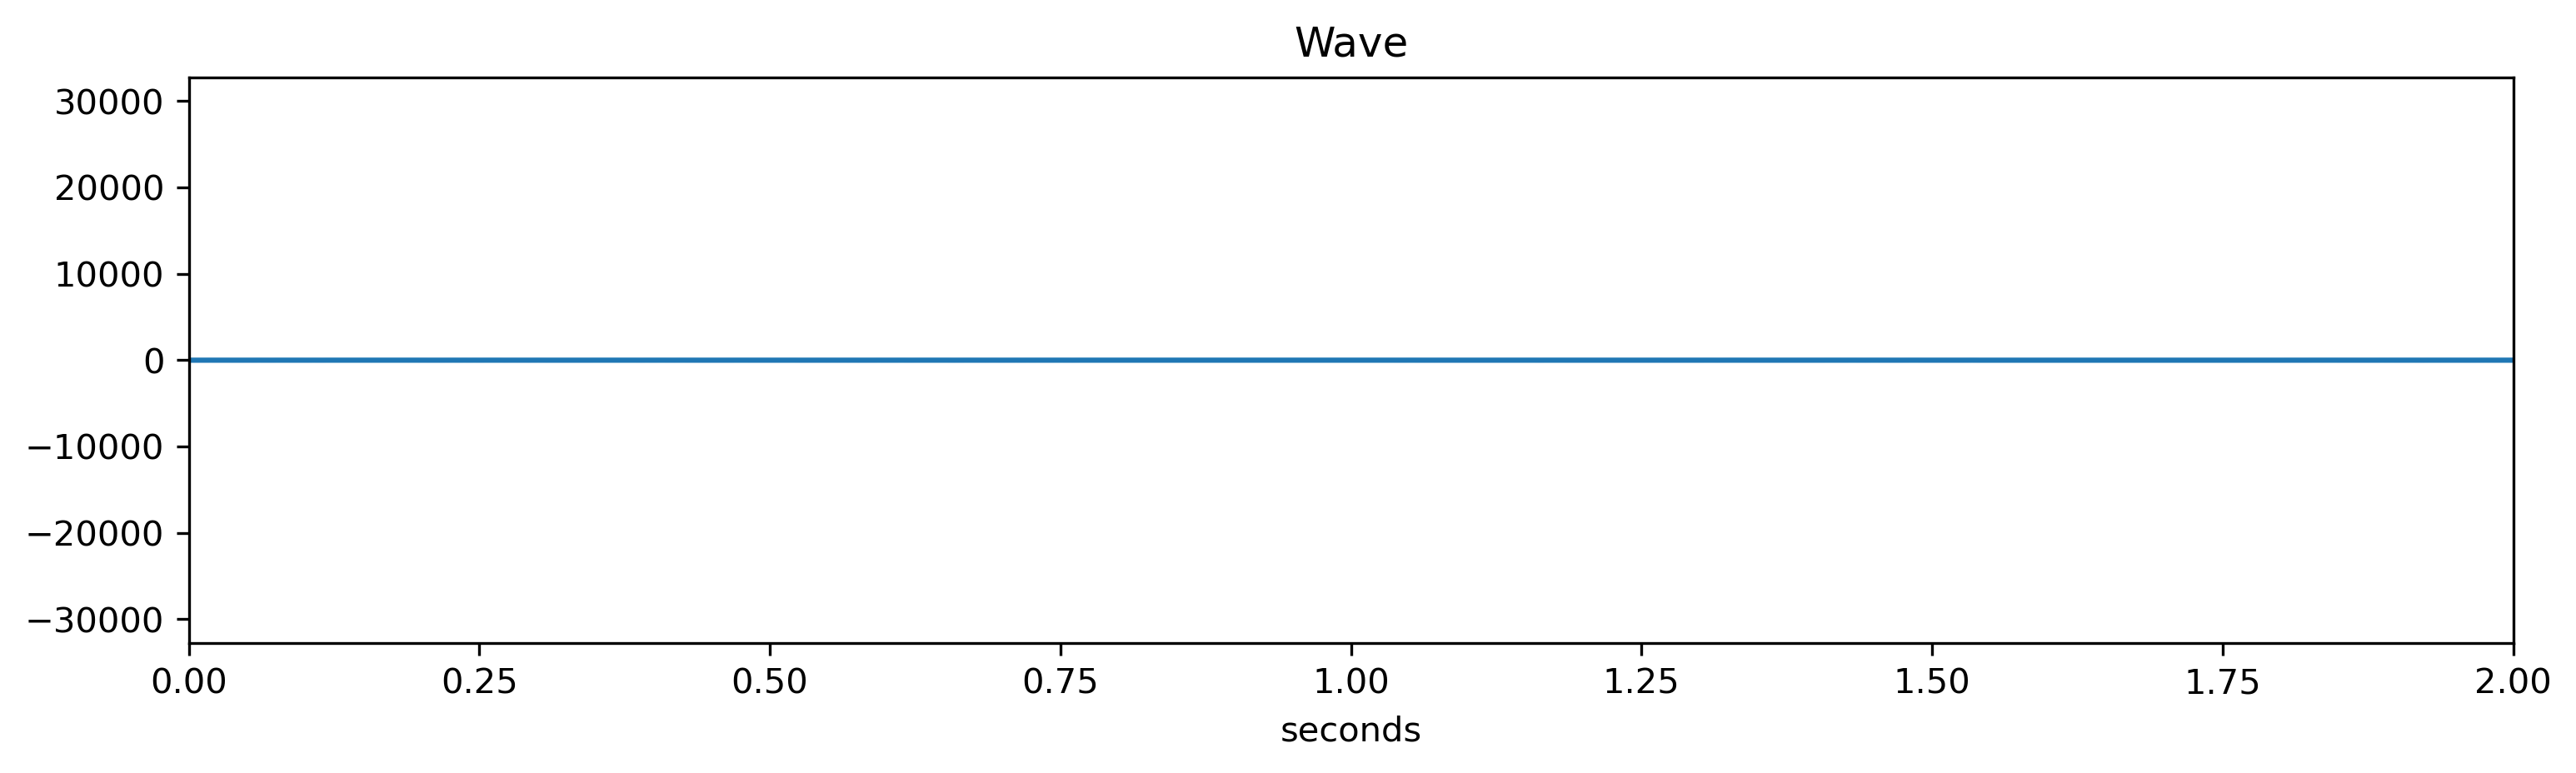

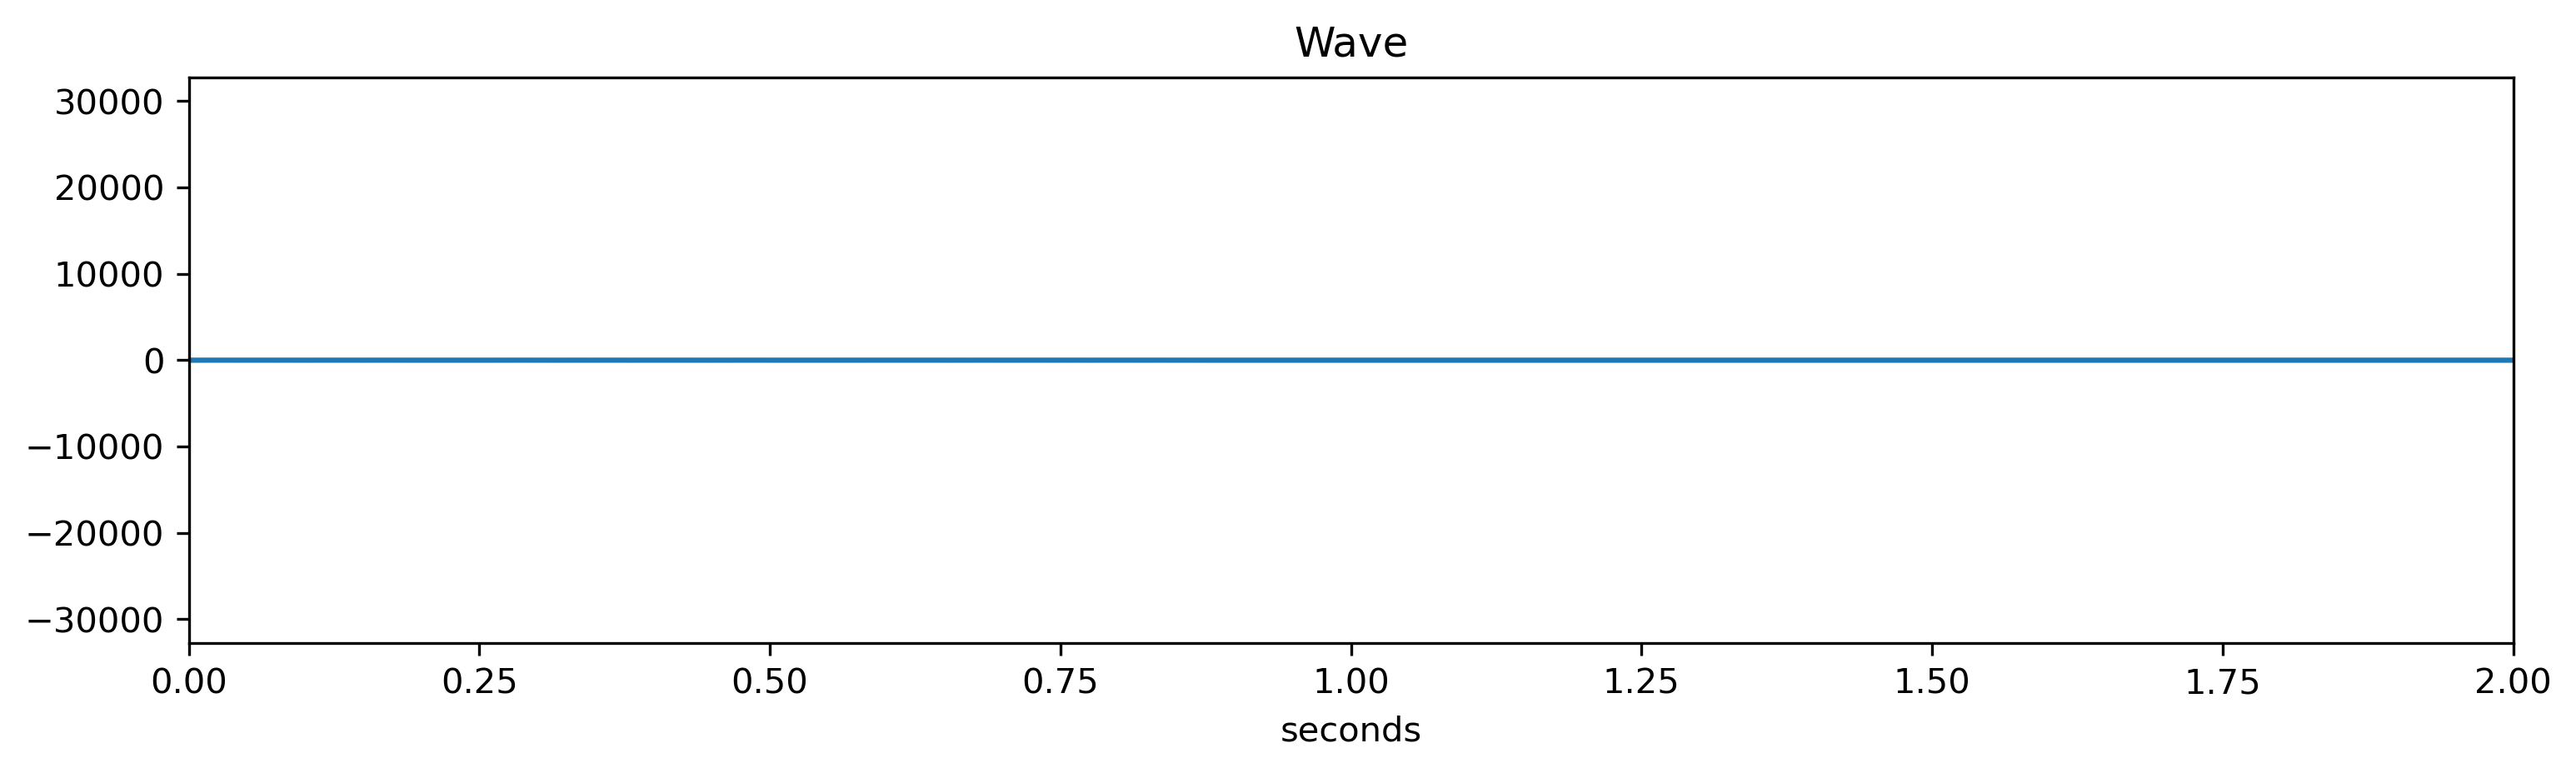

In [35]:
### create notes
SW2 = generate_note(440,2)
SW2.plot()
SW2.export("A.wav",True)

SW2 = generate_note(493.88,2)
SW2.plot()
SW2.export("B.wav",True)


In [36]:
IP.display.Audio(filename='A.wav')


In [37]:
IP.display.Audio(filename='B.wav')

In [38]:
Notes = {"A": 440, "B": 493.88, "C": 523.25, "D": 587.33, "E": 659.25} 




### Problem 1.4

- Implement `SoundWave.__add__()`.
- Generate a three-second A minor chord (A, C, and E) and embed it in the notebook.
- Implement `SoundWave.__rshift__()`.
- Generate the arpeggio A$\,\rightarrow\,$C$\,\rightarrow\,$E, where each tone lasts one second, and embed it in the notebook.

In [39]:
## create chords 
SWChord = generate_note(Notes["A"],3)
SWC = generate_note(Notes["C"],3)
SWE = generate_note(Notes["E"],3)
SWChord.__add__(SWC)
SWChord.__add__(SWE)

In [40]:
SWChord.export("chord.wav")

In [41]:
IP.display.Audio(filename='chord.wav')

In [42]:
## create song
SWSong = generate_note(Notes["A"],1)
SWC = generate_note(Notes["C"],1)
SWE = generate_note(Notes["E"],1)
SWSong.__rshift__(SWC)
SWSong.__rshift__(SWE)

In [43]:
SWSong.export("song.wav")
IP.display.Audio(filename='song.wav')

### Problem 1.5

- Implement `simple_dft()` with the formula $c=F_nf$, where $F_n$ is the n-dimensional DFT matrix.
- Use `np.allclose()` to check that `simple_dft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [45]:
def simple_dft(samples):
    """Compute the DFT of an array of samples.

    Parameters:
        samples ((n,) ndarray): an array of samples.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    ### compute the DFT
    n = len(samples)
    w = lambda k: np.exp(2*np.pi * 1j *k/ n)
    fn = np.array([[w(-k * l) for k in range(n)] for l in range(n)] )
    
    return fn@samples

In [46]:
s = np.random.randint(-32768, 32767, 8, dtype=np.int16)
print(simple_dft(s))
print(fft.fft(s))

[ 46828.        +0.00000000e+00j -82898.92188717+3.72990180e+04j
  20818.        +2.80020000e+04j -11515.07811283-3.18429820e+04j
 -52492.        -1.22606739e-11j -11515.07811283+3.18429820e+04j
  20818.        -2.80020000e+04j -82898.92188717-3.72990180e+04j]
[ 46828.            -0.j         -82898.92188717+37299.01796182j
  20818.        +28002.j         -11515.07811283-31842.98203818j
 -52492.            -0.j         -11515.07811283+31842.98203818j
  20818.        -28002.j         -82898.92188717-37299.01796182j]


### Problem 1.6

- Implement `simple_fft()`.
- Generate an array of $8192$ random samples and take its DFT using `simple_dft()`, `simple_fft()`, and `scipy.fftpack.fft()`.
Print the runtimes of each computation.
- Use `np.allclose()` to check that `simple_fft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [47]:
def simple_fft(samples, threshold=1):
    """Compute the DFT using the FFT algorithm.
    
    Parameters:
        samples ((n,) ndarray): an array of samples.
        threshold (int): when a subarray of samples has fewer
            elements than this integer, use simple_dft() to
            compute the DFT of that subarray.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    ### compute the FFT
    f = samples
    N = threshold
    def Split(g):
        n = len(g)
        if n <= N:
            return n*simple_dft(g)
        else:
            even = Split(g[::2])
            odd = Split(g[1::2])
            z = np.zeros(n).astype(complex)
            for k in range(n):
                z[k] = np.exp(-2*np.pi*1j*k/n)
            m = n//2
            return np.hstack([even + z[:m]*odd, even + z[m:]*odd])
    return Split(f)/len(f)

In [48]:

s = np.random.randint(-32768, 32767, 8192, dtype=np.int16)
print(np.abs(simple_fft(s) *len(s)))

%time

[3558180.         1441725.64457559  545984.33384439 ... 1857242.84945421
  545984.3338444  1441725.64457559]
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [49]:

print(np.abs(fft.fft(s)))
%time

[3558180.         1441725.64457559  545984.33384439 ... 1857242.84945421
  545984.33384439 1441725.64457559]
CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 11.7 µs


In [50]:

print(np.allclose(np.abs(simple_fft(s) *len(s)), np.abs(fft.fft(s))))
%time

True
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.72 µs


### Problem 1.7

- Modify `SoundWave.plot()` so that it accepts a boolean. When the boolean is `True`, take the DFT of the stored samples and plot (in a new subplot) the frequencies present on the $x$-axis and the magnituds of those frequences on the $y$-axis. Only the display the first half of the plot, and adjust the $x$-axis so that it correctly shows the frequencies in Hertz.
- Display the plot of the DFT of an A tone.
- Display the plot of the DFT of an A minor chord.

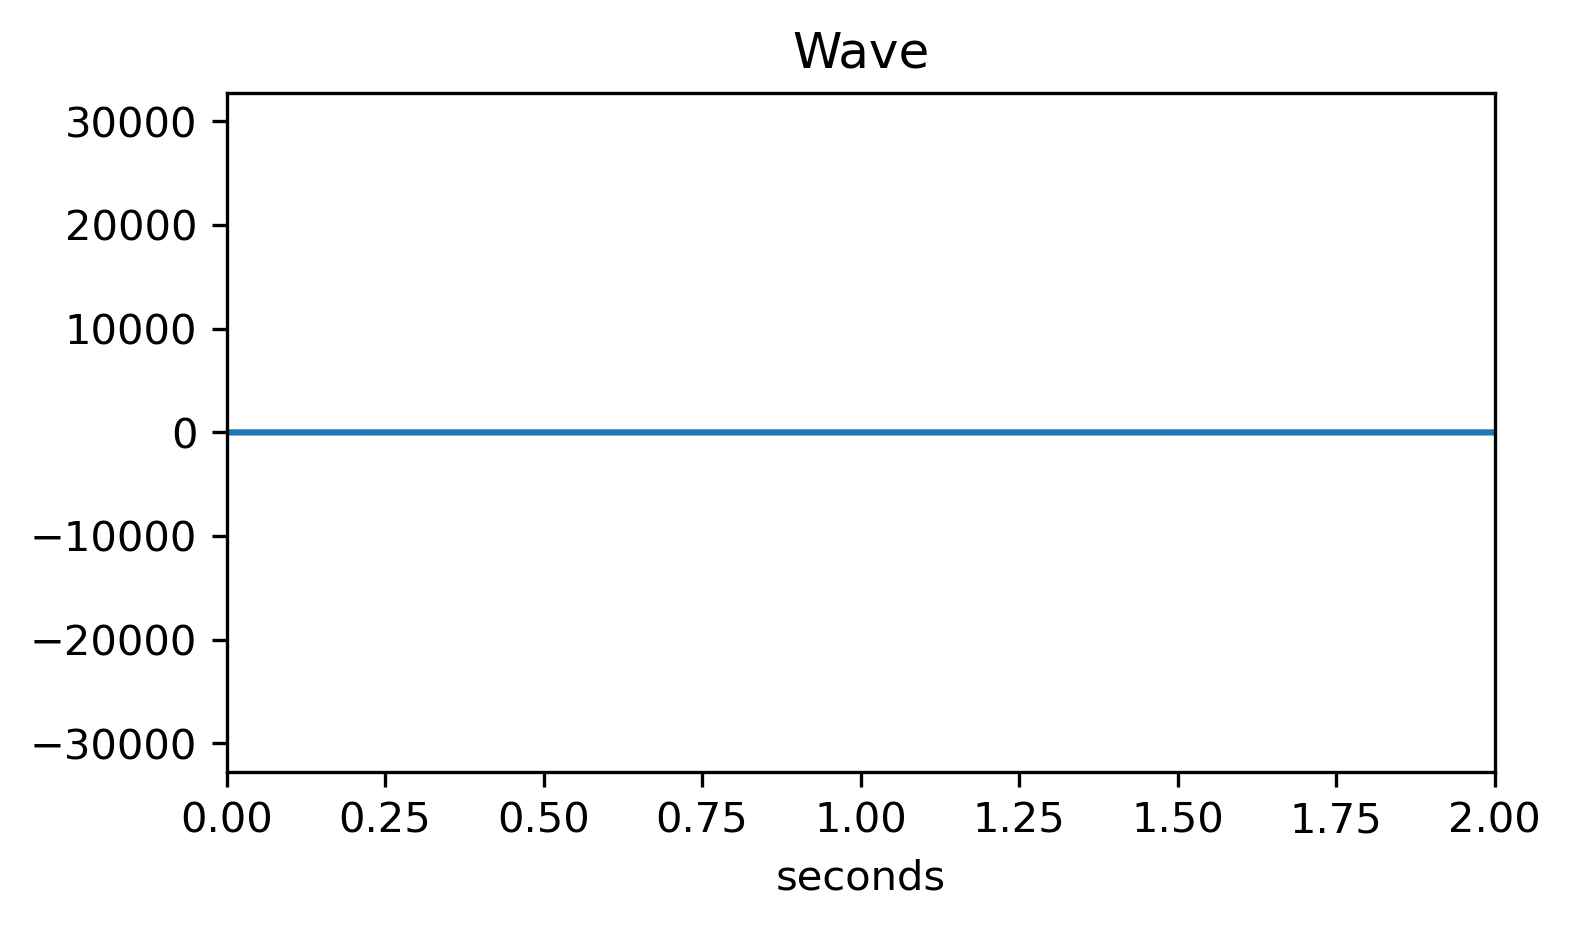

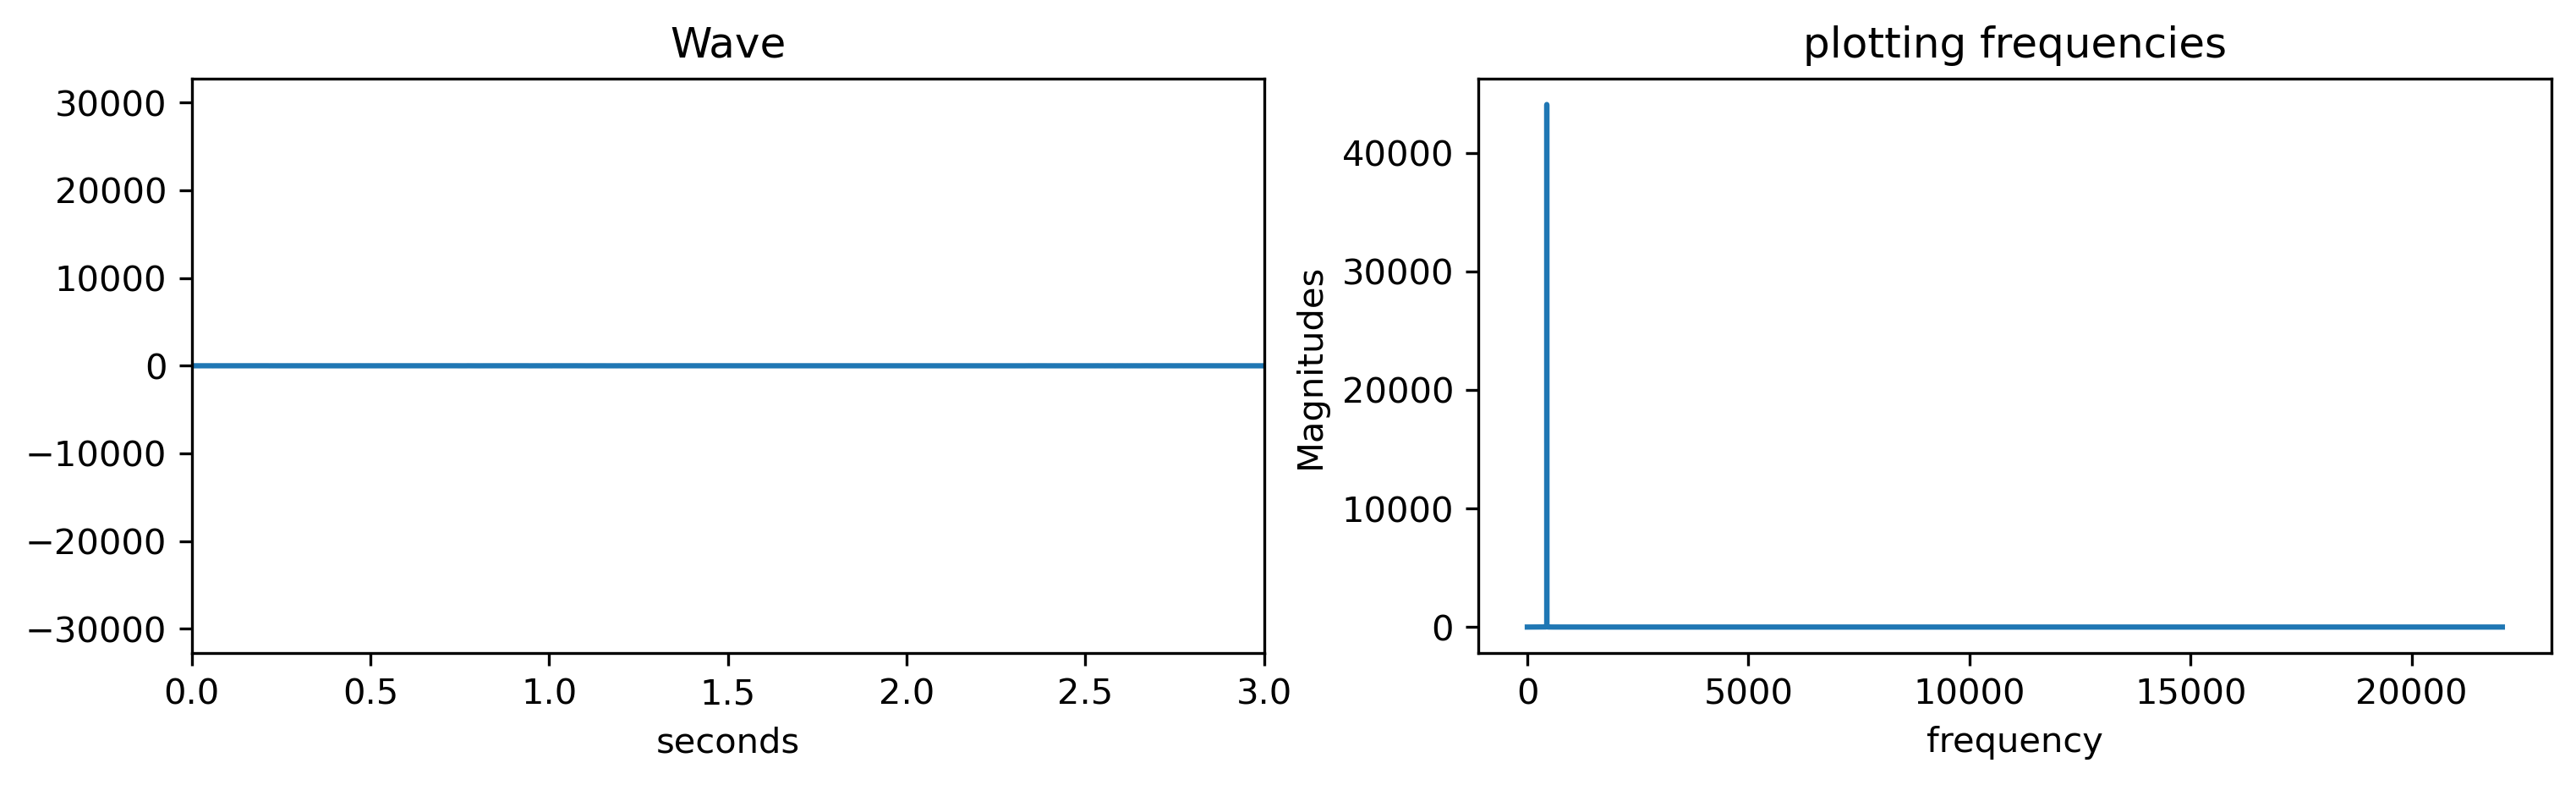

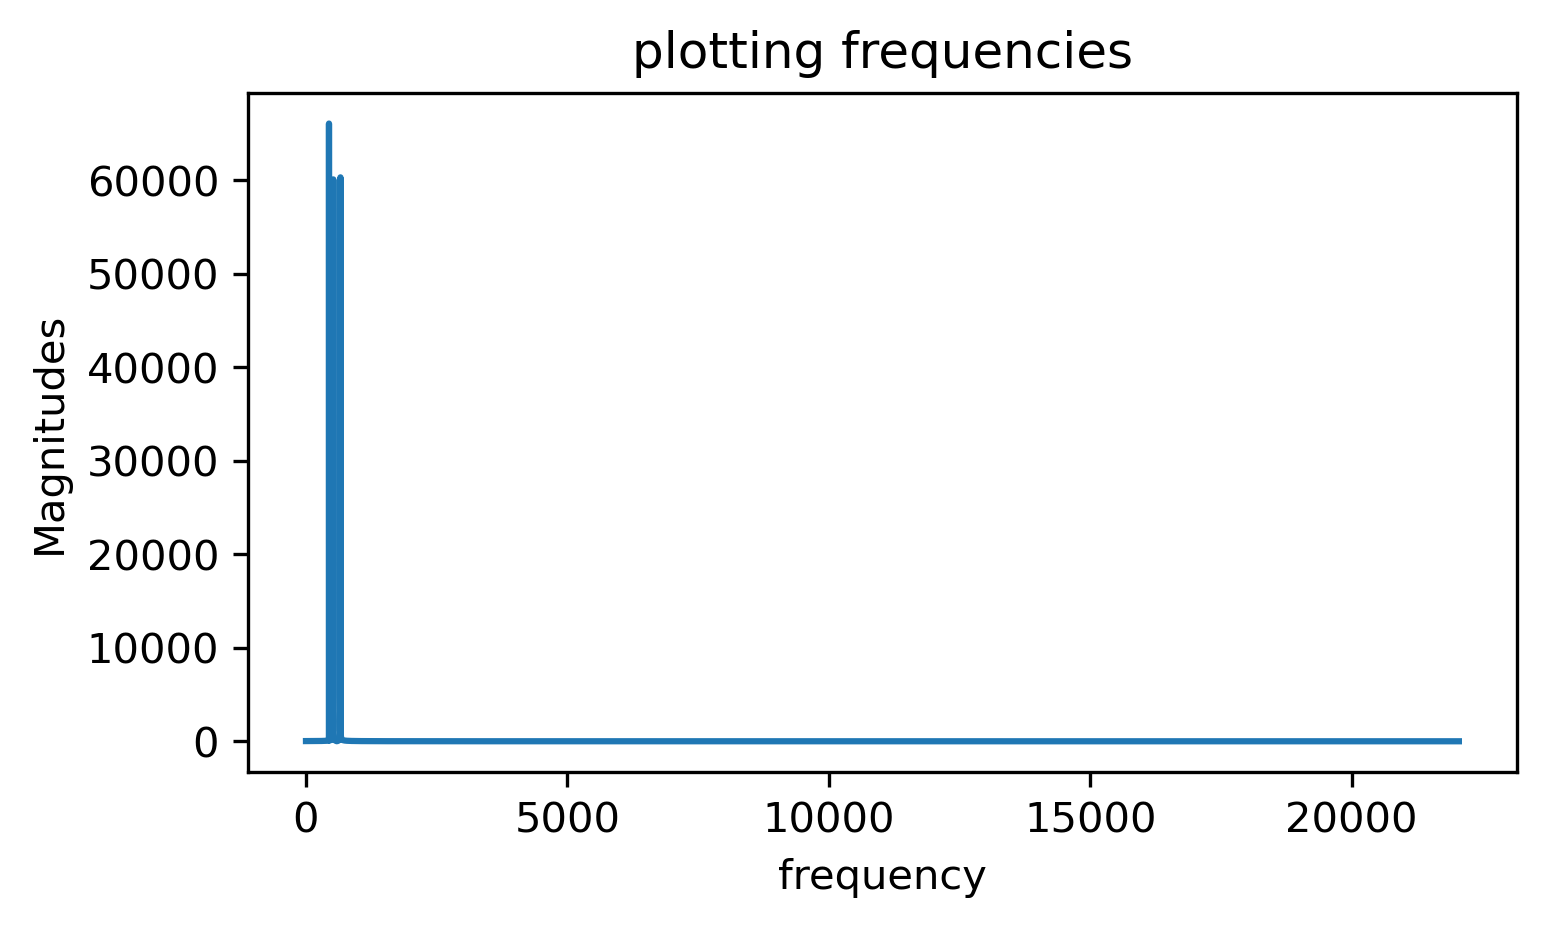

In [53]:
### plot frequency Graphs
SWA = generate_note(Notes["A"],2)
SWA.plot(True)

SWChord = generate_note(Notes["A"],3)
SWC = generate_note(Notes["C"],3)
SWE = generate_note(Notes["E"],3)
SWChord.__add__(SWC)
SWChord.__add__(SWE)
SWChord.plot(True)

### Problem 1.8

Use the DFT to determine the individual notes that are present in `mystery_chord.wav`.

[440.   784.   523.25 587.5 ]


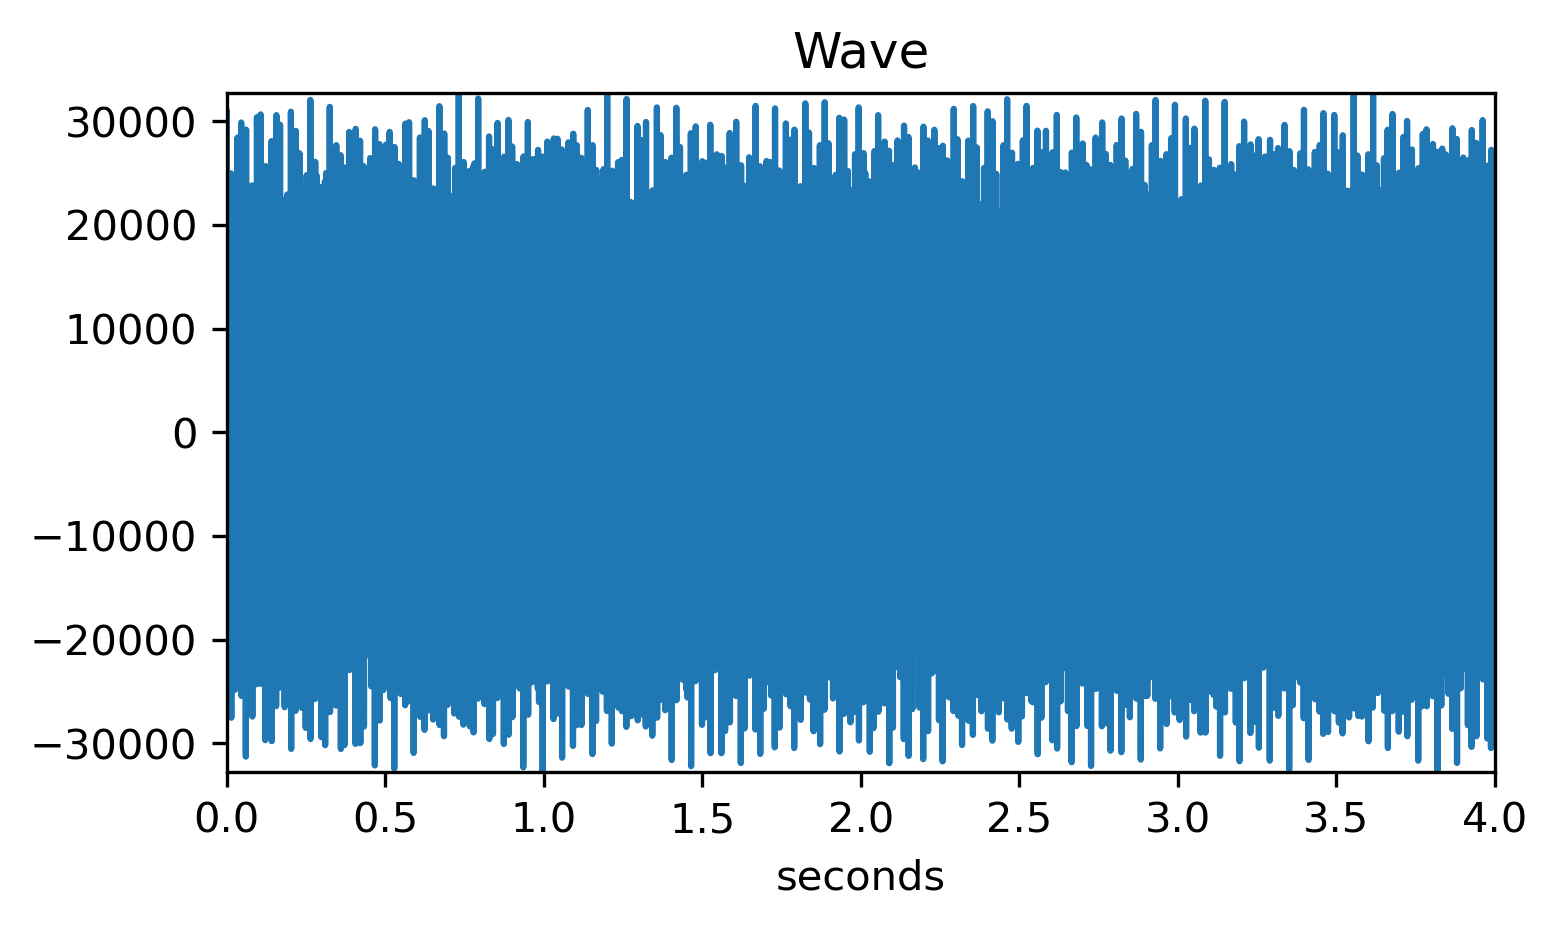

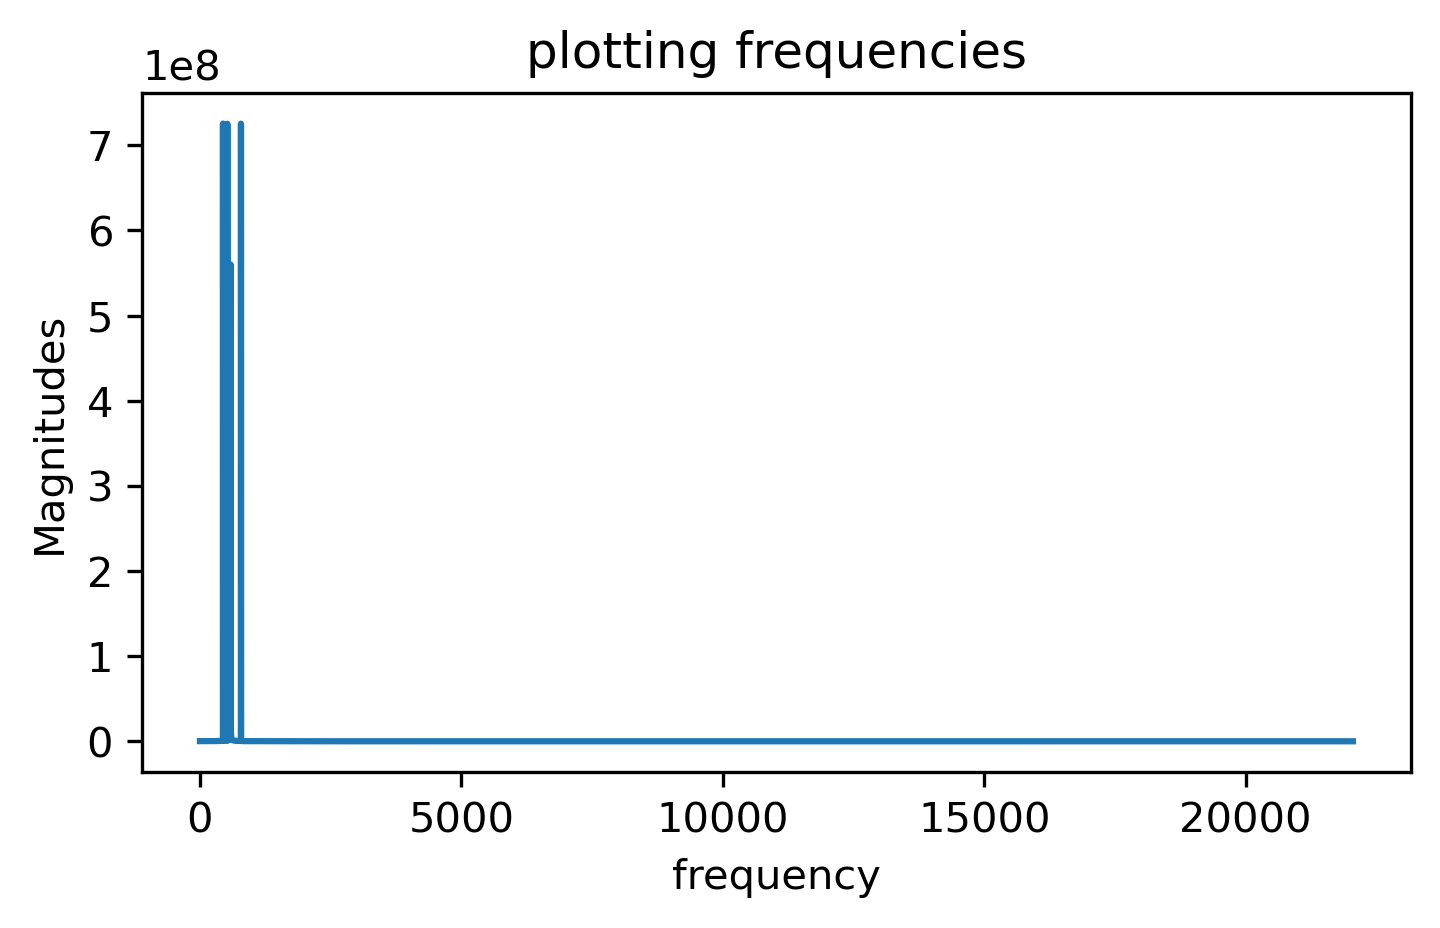

In [74]:
### find notes of mystery chord
rate, samples = wavfile.read("mystery_chord.wav")
mags = fft.fft(samples)[:len(samples)//2]
maxs = np.argsort(abs(mags))[::-1][:4]
print(maxs*rate/len(samples))
SW = SoundWave(rate,samples)
SW.plot(True)

In [76]:
print("The notes Are A C D G")

The notes Are A C D G


The notes are...

<h2 align="center">Part 2: Convolution and Filtering.</h2>

### Problem 2.1

- Implement `SoundWave.__mul__()` for circular convolution.
- Generate 2 seconds of white noise at the same sample rate as `tada.wav`.
- Compute the circular convolution of `tada.wav` and the white noise. Embed the result in the notebook.
- Append the circular convolution to itself and embed the result in the notebook.

fsajkldfjkl

In [79]:
rate = 22050 # Create 2 seconds of white noise at a given rate.
white_noise = np.random.randint(-32767, 32767, rate*4, dtype=np.int16)
WN = SoundWave(rate,white_noise) 

In [80]:
rate, samples = wavfile.read("tada.wav")
SW = SoundWave(rate,samples)

In [81]:
newWave = SoundWave(rate, SW * WN)


In [82]:
SW = SW>>newWave

### Problem 2.2

- Implement `SoundWave.__pow__()` for linear convolution.
- Time the linear convolution of `CGC.wav` and `GCG.wav` using `SoundWave.__pow__()` and `scipy.signal.fftconvolve()`.
- Embed the two original sounds and their convolutions in the notebook. Check that the convolutions with `SoundWave.__pow__()` and `scipy.signal.fftconvolve()` sound the same.

In [83]:
rate, samples = wavfile.read("CGC.wav")
CGC = SoundWave(rate,samples)
rate, samples = wavfile.read("GCG.wav")
GCG = SoundWave(rate,samples)

In [84]:
%%time
pwrWave = CGC ** GCG

CPU times: user 55.3 ms, sys: 18 ms, total: 73.3 ms
Wall time: 71.7 ms


### Problem 2.3

Use `SoundWave.__pow__()` or `scipy.signal.fftconvolve()` to compute the linear convolution of `chopin.wav` and `balloon.wav`.
Embed the two original sounds and their convolution in the notebook.

In [85]:
rate, samples = wavfile.read("chopin.wav")
chopin = SoundWave(rate,samples)
rate, samples = wavfile.read("balloon.wav")
balloon = SoundWave(rate,samples)

In [86]:
echo = chopin ** balloon

### Problem 2.4

- Implement `SoundWave.clean()`.
- Clean `noisy1.wav` by filtering out frequencies from $1250$-$2600$ Hz. Embed the original and the cleaned versions in the notebook.
- Clean `noisy2.wav`. Embed the original and the cleaned versions in the notebook.

In [90]:
rate, samples = wavfile.read("noisy1.wav")
noisy1 = SoundWave(rate,samples)
Nclean1 = SoundWave(rate, noisy1.clean(1250,2600))


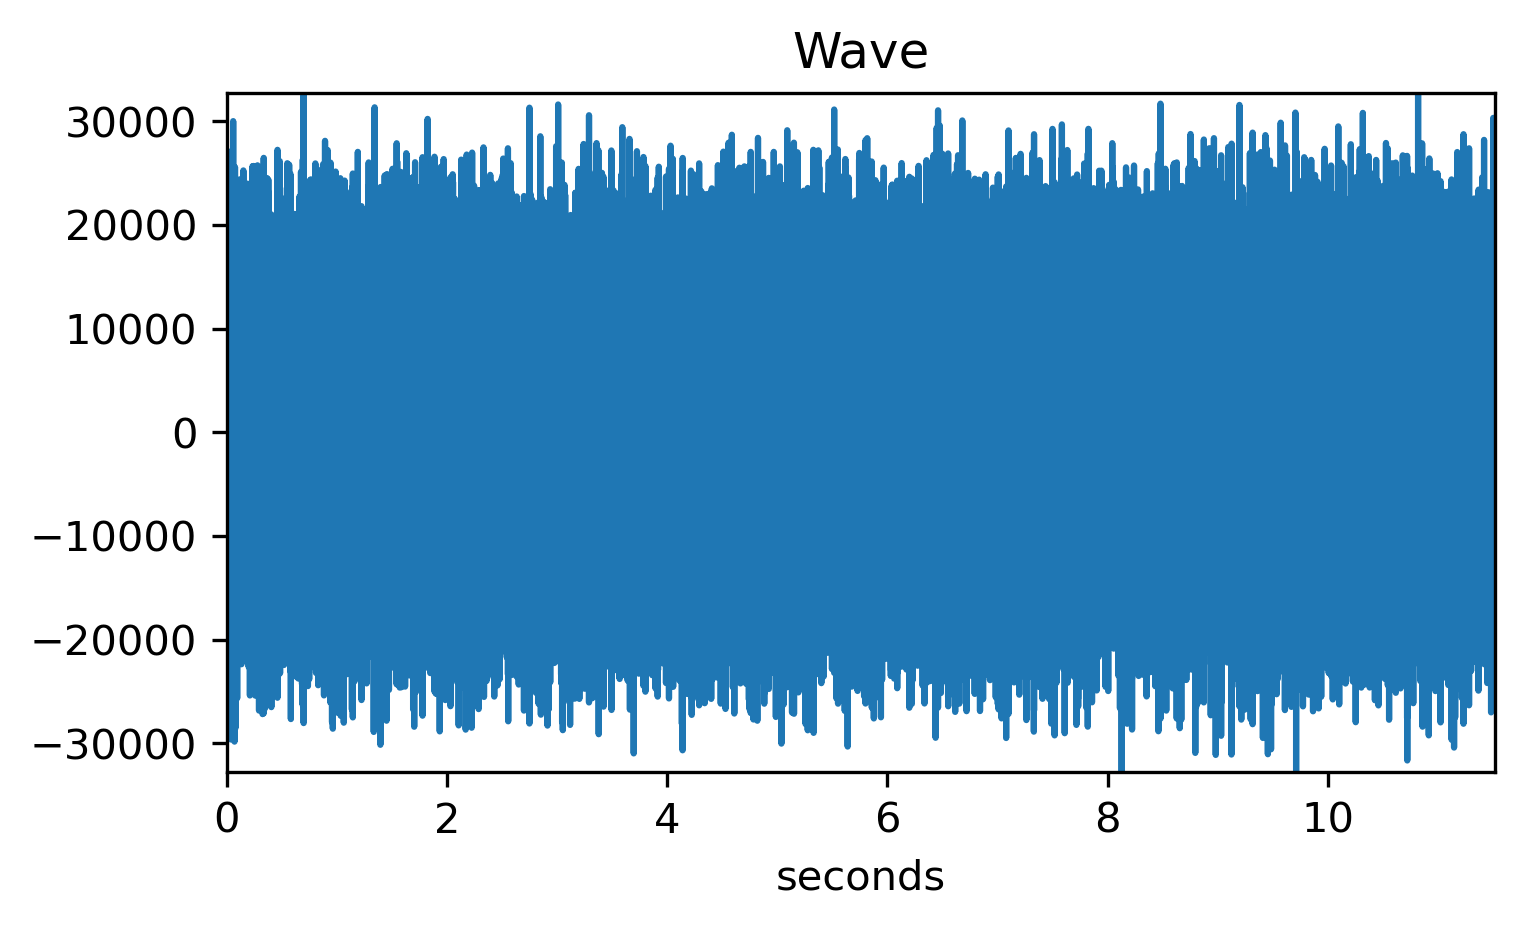

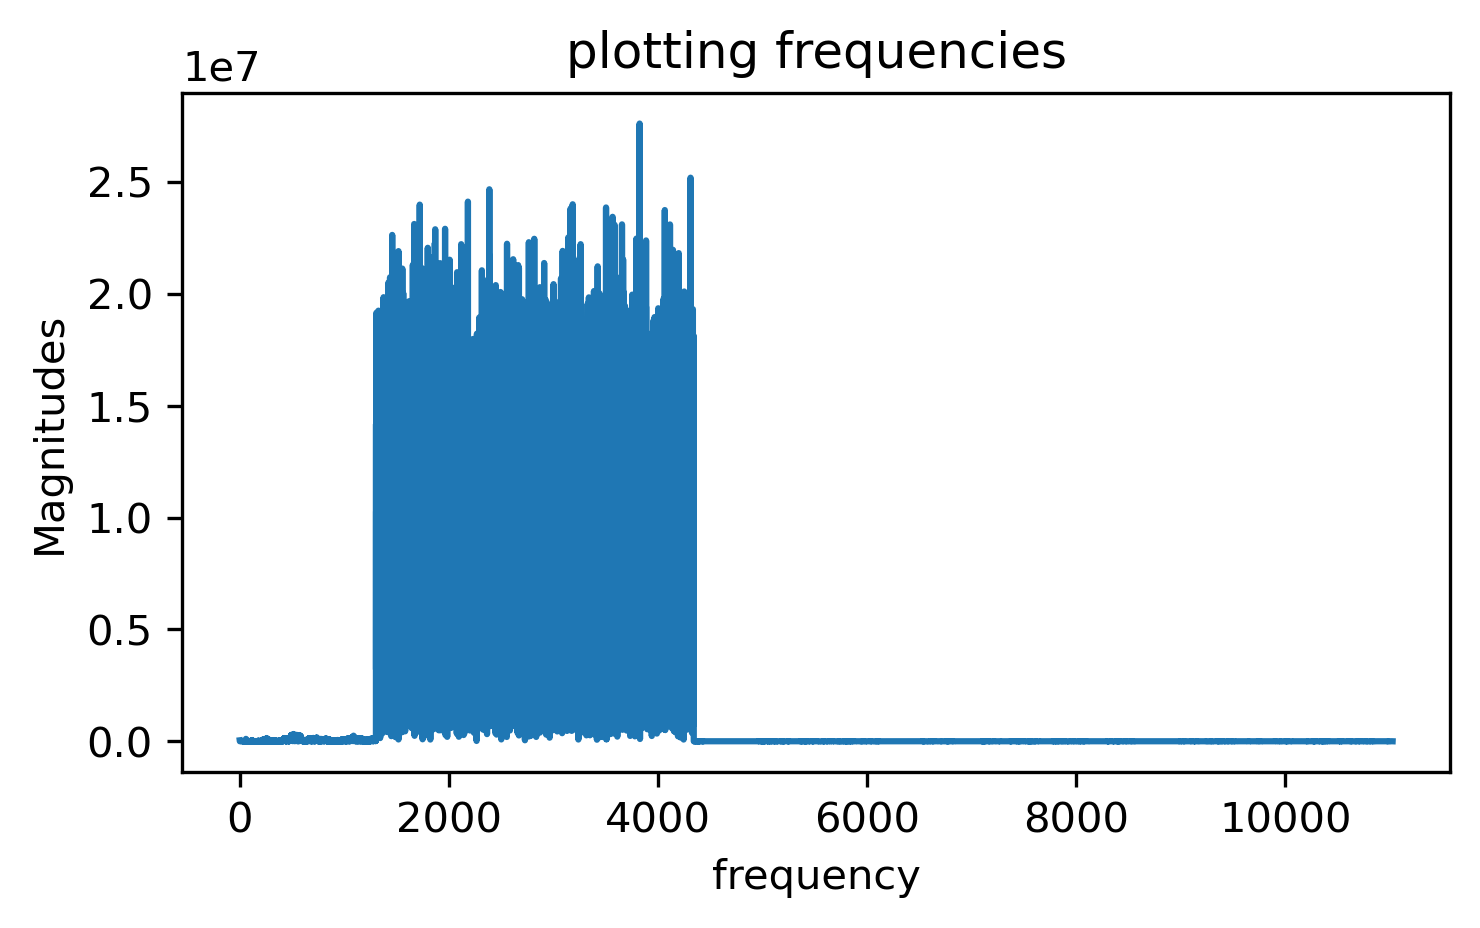

In [91]:
rate, samples = wavfile.read("noisy2.wav")
noisy2 = SoundWave(rate,samples)
noisy2
noisy2.plot(True)

/Users/sean/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


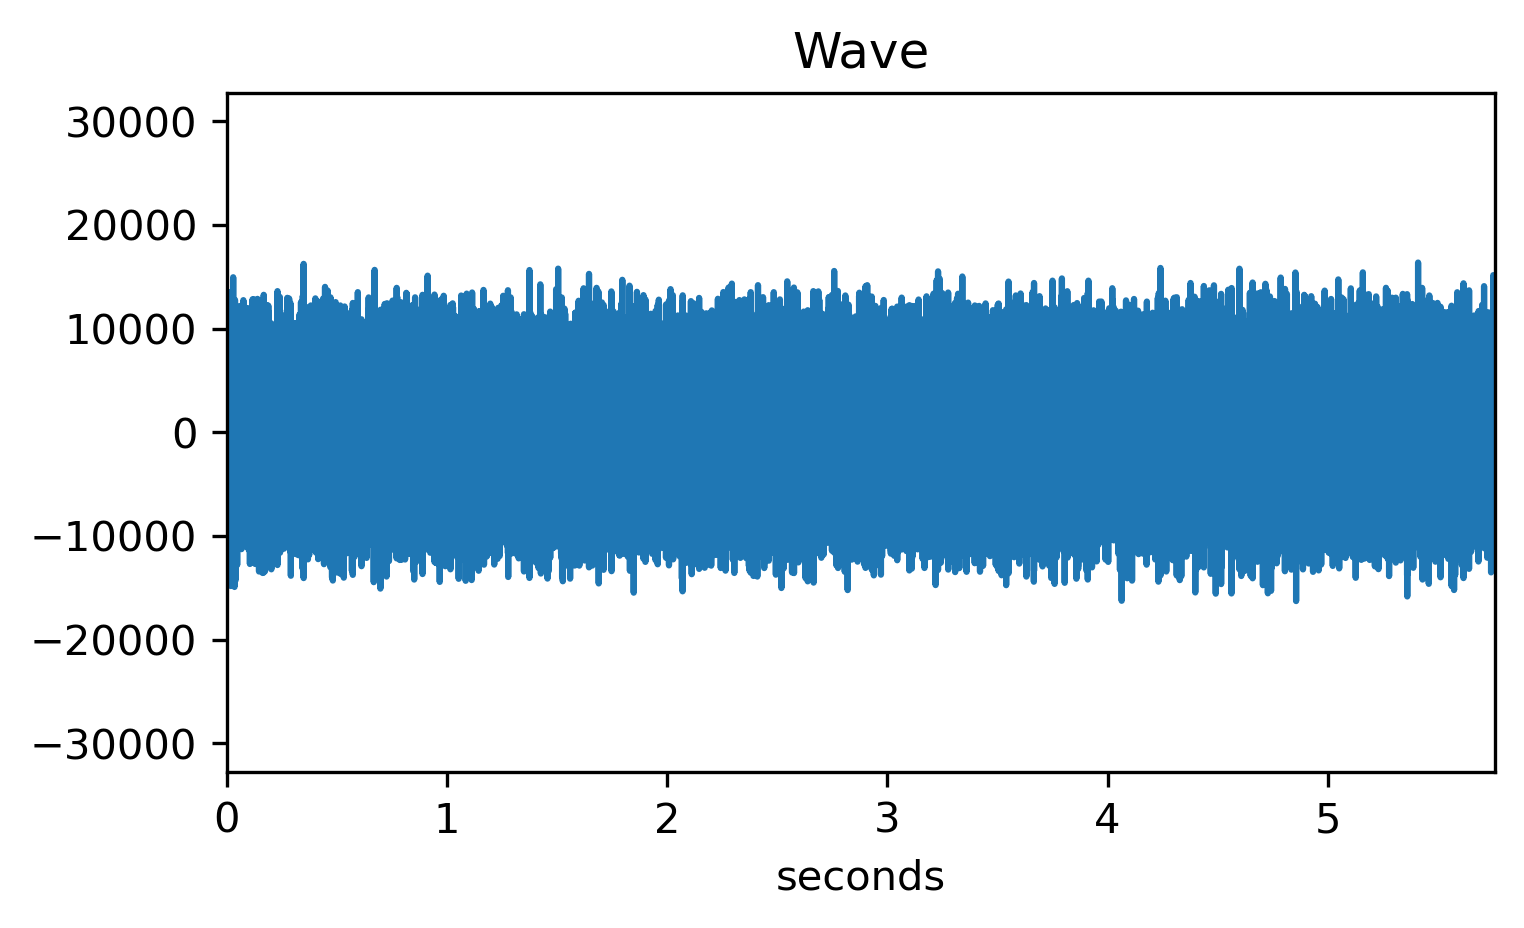

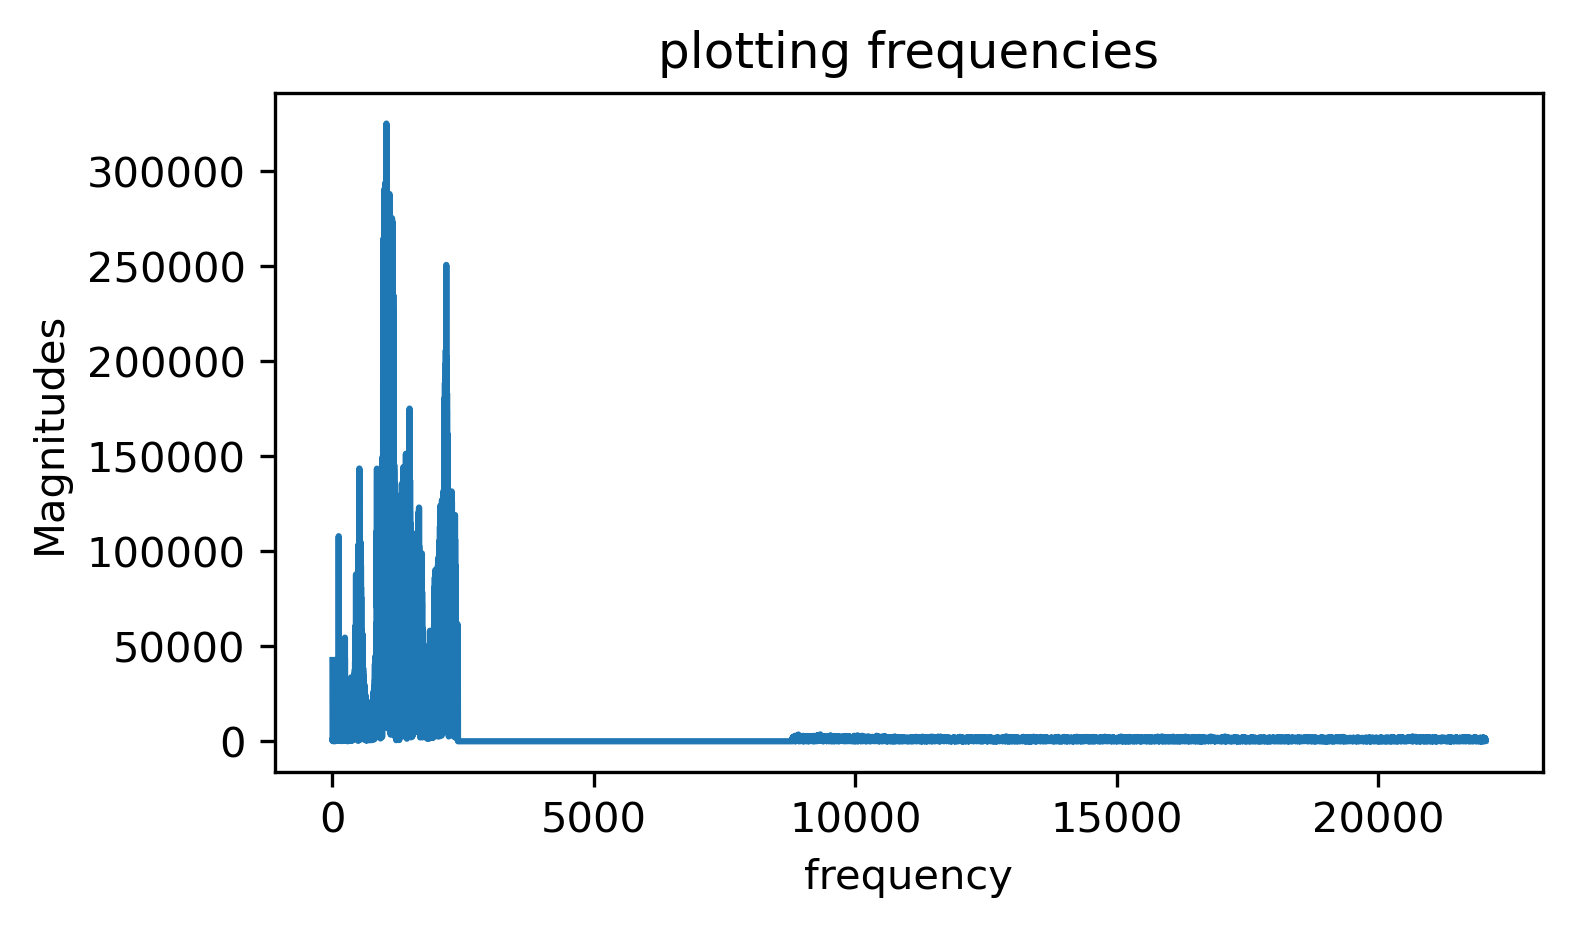

In [109]:
Nclean2 = SoundWave(rate, noisy2.clean(1200,4400))
Nclean2.plot(True)

In [101]:

Nclean2.export("NClean.wav")
#IP.display.Audio(filename='noisy2.wav')
IP.display.Audio(filename='NClean.wav')

### Problem 2.5

- Clean `vuvuzela.wav` by filtering bad frequencies out of the left and right channels individually.
- Recombine the left and right channels and embed the result in the notebook.

In [119]:
rate, samples = wavfile.read("vuvuzela.wav")
vuvuzela = SoundWave(rate,samples)
vuvuzelaClean = SoundWave(rate, noisy1.clean(200,500))
vuvuzelaClean.export("vuvuzelaClean.wav")


In [120]:
IP.display.Audio(filename='vuvuzela.wav')

In [121]:
IP.display.Audio(filename='vuvuzelaClean.wav')

### Problem 2.6

- Clean up `license_plate.png` so that the year printed on the sticker in the bottom right corner of the plate is legible.
- Display the original and cleaned images.

In [123]:
from scipy.fftpack import fft2, ifft2

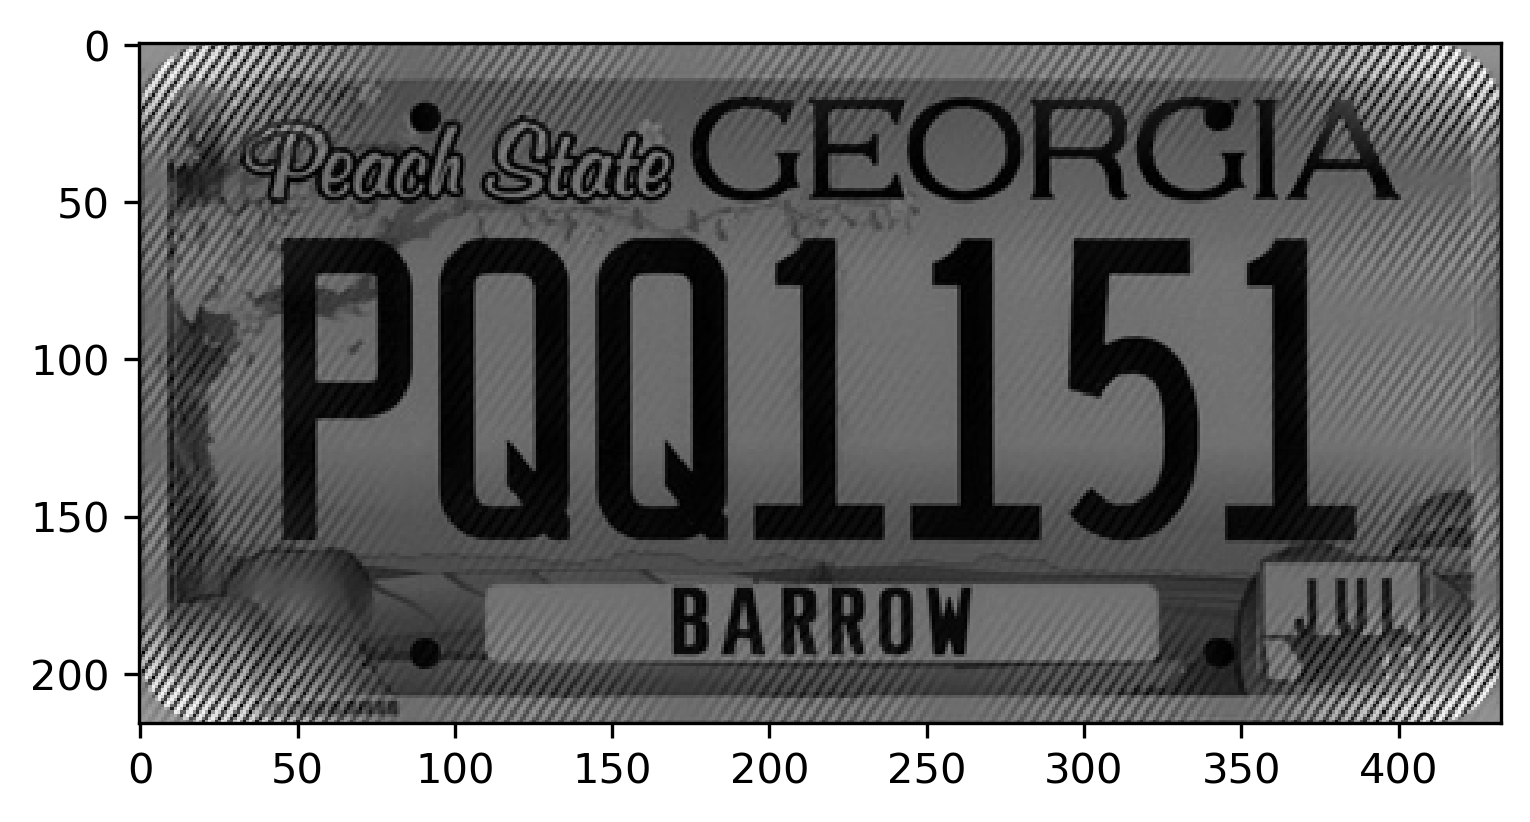

In [156]:
# Read the image.
import imageio
image = imageio.imread("license_plate.png")
plt.imshow(image, cmap="gray")


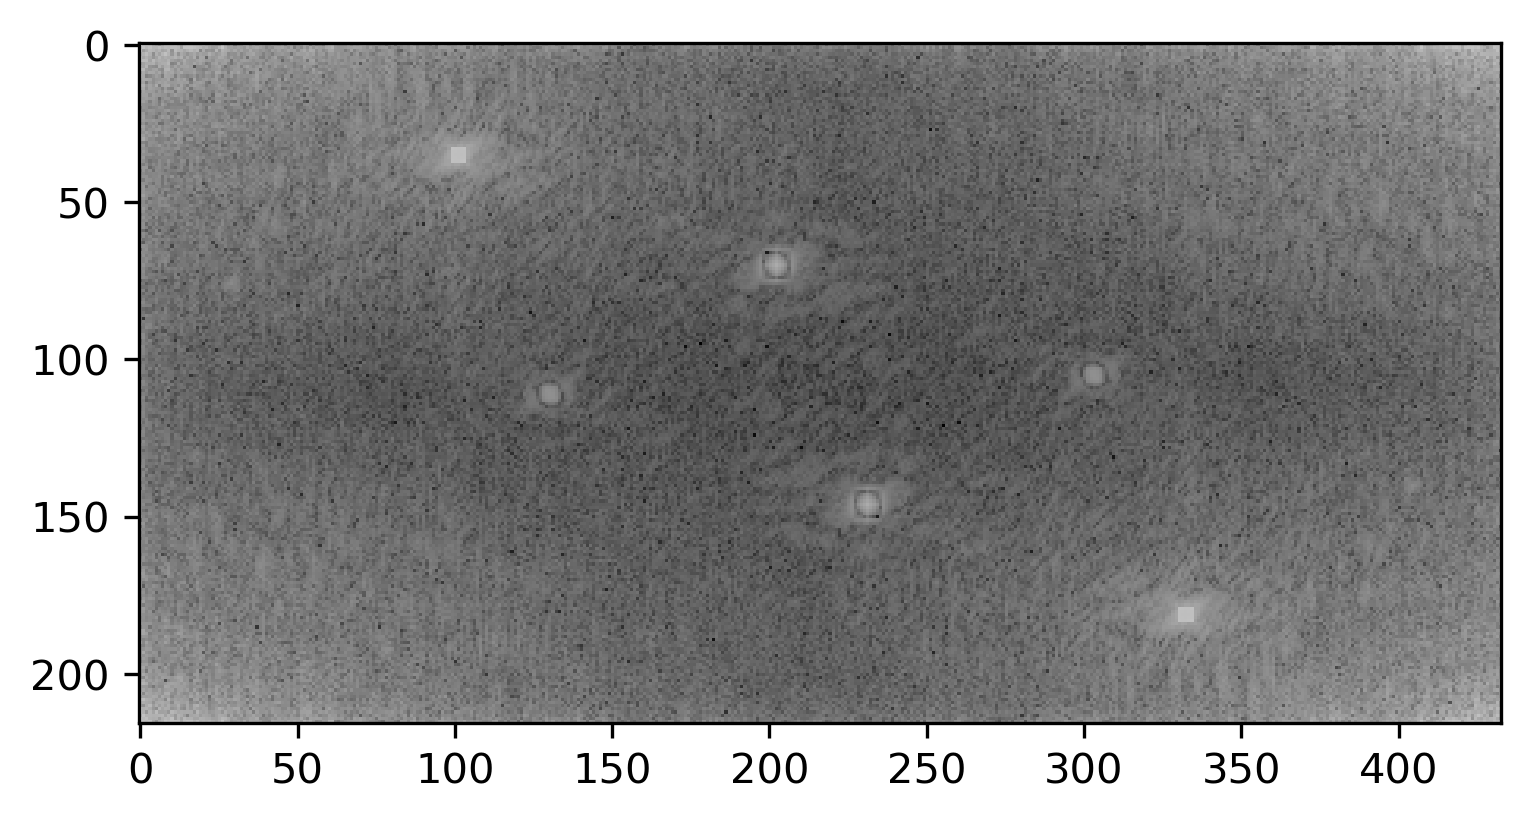

In [157]:
# Plot the log magnitude of the image's DFT.
im_dft = fft2(image)
plt.imshow(np.log(np.abs(im_dft)), cmap="gray")
plt.show()
average = np.mean(im_dft)

In [164]:
im_dft[im_dft > 10000000] = average


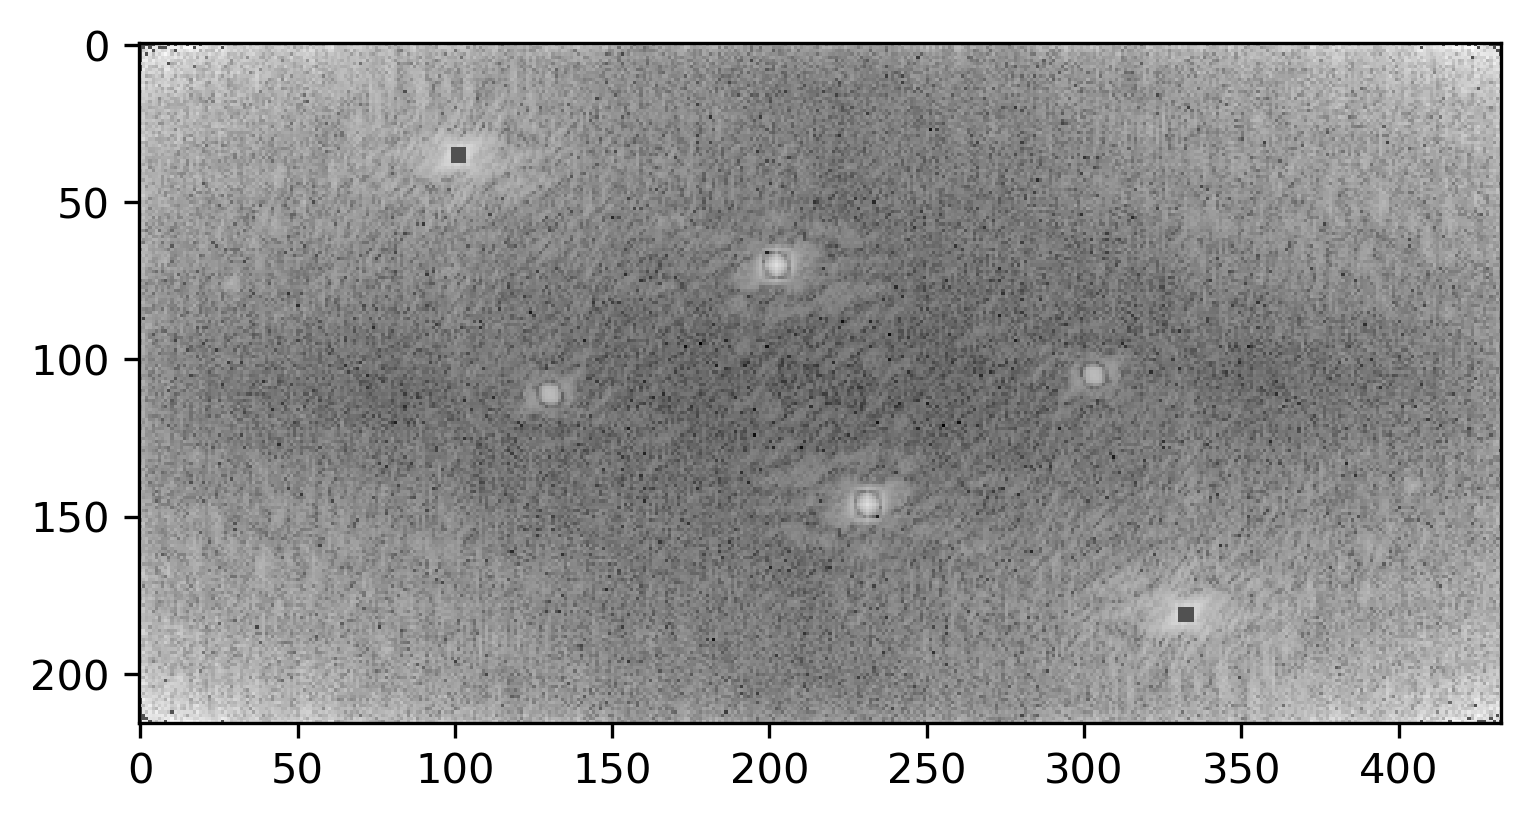

In [165]:

plt.imshow(np.log(np.abs(im_dft)), cmap="gray")
plt.show()
average = np.mean(im_dft)

<ipython-input-166-b3bc7cace5fc>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  image_clean = ifft2(im_dft).astype(float)


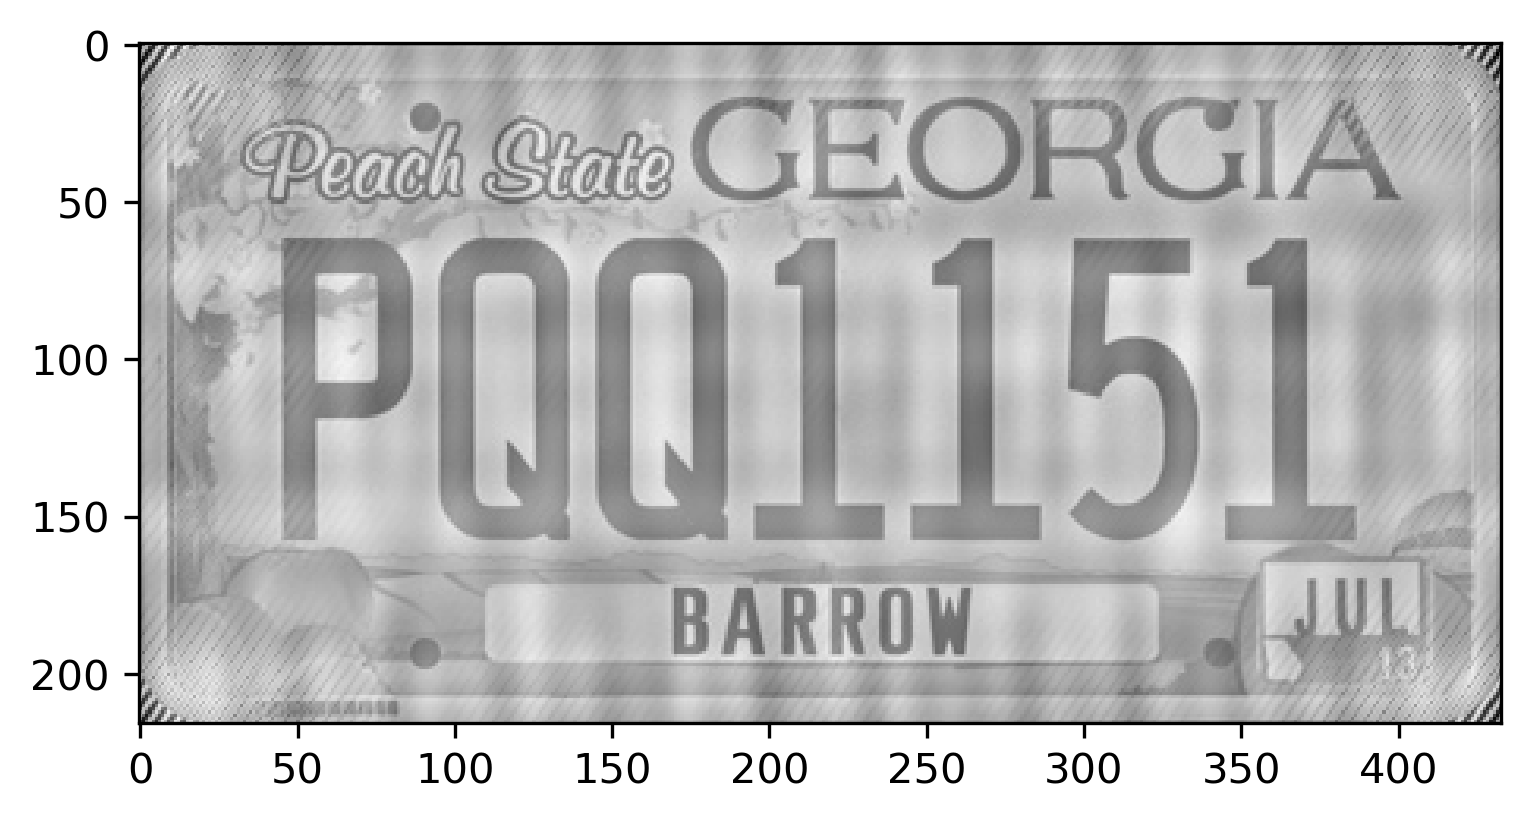

In [166]:
image_clean = ifft2(im_dft).astype(float)
plt.imshow(image_clean, cmap="gray")
plt.show()


The year on the sticker is...

2013